# Otimização de Hiperparâmetros - Algorítimo Genético

## Importação de Bibliotecas necessárias

In [220]:
from sklearn.datasets import load_wine
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Carregamento do dataframe que esta sendo utilizado

In [221]:
dados_vinho = load_wine()
df = pd.DataFrame(dados_vinho.data, columns=dados_vinho.feature_names)
df['Result'] = dados_vinho.target

## Tratamento dos dados caso existam dados vazios no dataframe

In [222]:
for i in df.columns:
    if df[i].dtype in (np.float64, np.int32):
        df[i].fillna(0)
    else:
        df[i].fillna('Na')

## Definição das variáveis independentes e dependentes e separação de bases

In [223]:
x = np.asanyarray(df[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']].values)
y = np.asanyarray(df[['Result']].values)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=28)

## Criação da função população para geração aleatória de indivíduos

In [224]:
def Populacao(Tam_pop):
    populacao = []
    for i in range(0,Tam_pop):
        individuo = []
        #Escolha aleatória do critério utilizado na árvore
        criterio = random.choice(['gini','entropy','log_loss'])
        individuo.append(criterio)

        #Escolha aleatória de max_depth da árvore
        max_depth = random.randint(1,15)
        individuo.append(max_depth)

        #Escolha aleatória no mínimo de amostras
        min_samples_leaf = random.randint(2,20)
        individuo.append(min_samples_leaf)

        #Esolha aleatória do mínimo de amostras
        min_samples_split = random.randint(2,20)
        individuo.append(min_samples_split)

        populacao.append(individuo)
    return populacao

## Criação da Função Mutação para o retorno do indivíduo mutado

In [225]:
def Mutacao(individuo):
    # Mutação na profundidade máxima
    if random.random() < taxa_mutacao:
        max_depth = random.randint(1, 15)
        individuo[1] = max_depth
    
    # Mutação no critério
    if random.random() < taxa_mutacao:
        criterio = random.choice(['gini', 'entropy','log_loss'])
        individuo[0] = criterio
    
    # Mutação no número mínimo de amostras na folha
    if random.random() < taxa_mutacao:
        min_samples_leaf = random.randint(2, 20)
        individuo[2] = min_samples_leaf

    # Mutação no número mínimo de amostras para divisão
    if random.random() < taxa_mutacao:
        min_samples_split = random.randint(2, 20)
        individuo[3] = min_samples_split

    return individuo

## Criação da função seleção

In [226]:
def Selecao(populacao):
    populacao_ordenada = sorted(populacao, key = lambda x : Fitness(x),reverse = True)
    pais_selecionados_para_cruzamento = populacao_ordenada[:len(populacao_ordenada)//2]
    return pais_selecionados_para_cruzamento

## Criação da Função Fitness

In [227]:
def Fitness(individuo):
    tree = DecisionTreeClassifier(max_depth = individuo[1], criterion= individuo[0], min_samples_leaf= individuo[2], min_samples_split= individuo[3])
    tree.fit(x_treino, y_treino)
    y_pred = tree.predict(x_teste)
    accuracy = accuracy_score(y_teste, y_pred)
    return accuracy

## Criação da função de Cruzamento entre os pais selecionados

In [228]:
def Cruzamento(pai1, pai2):
    # Criando filhos
    filho1 = []
    filho2 = []
    
    # Adicionando o critério ao filho 1 e ao filho 2
    filho1.append(pai1[0])
    filho2.append(pai2[0])

    # Adicionando o max_depth ao filho 1 e ao filho 2
    filho1.append(pai1[1])
    filho2.append(pai2[1])
    
    for i in range(2, len(pai1)):
        if i % 2 == 0:
            filho1.append(pai1[i])
            filho2.append(pai2[i])
        else:
            filho1.append(pai2[i])
            filho2.append(pai1[i])
    
    return filho1, filho2

## Definição de parâmetros

In [229]:
#Definição de parâmetros
Tam_pop = 50
geracoes = 20
taxa_mutacao = 0.28

## Definição do algorítimo genético

In [230]:
#Definição do Algorítimo genético
populacao = Populacao(Tam_pop)
melhores_acuracias = []
for i in range(geracoes):
    proxima_geracao = []
    while len(proxima_geracao) < Tam_pop:
        pai1, pai2 = random.sample(Selecao(populacao),2)
        filho1, filho2 = Cruzamento(pai1, pai2)
        filho1 = Mutacao(filho1)
        filho2 = Mutacao(filho2)
        proxima_geracao.append(filho1)
        proxima_geracao.append(filho2)
    populacao = proxima_geracao
    melhor_da_geracao = max(populacao, key = Fitness)
    melhores_acuracias.append(Fitness(melhor_da_geracao))

## Definição da melhor solução

In [231]:
#Melhor solução
melhor_s = max(populacao, key = lambda x : Fitness(x))
tree = DecisionTreeClassifier(max_depth = melhor_s[1], criterion= melhor_s[0], min_samples_leaf= melhor_s[2], min_samples_split= melhor_s[3])
tree.fit(x_treino, y_treino)
y_pred = tree.predict(x_teste)
accuracy = accuracy_score(y_teste, y_pred)
print(f'Acurácia gerada pelo algorítimo genético {accuracy}')
print(f'Foi utilizado o critério: {melhor_s[0]}')
print(f'Foi utilizado como max_depth: {melhor_s[1]}')
print(f'Foi utilizado como min_samples_leaf: {melhor_s[2]}')
print(f'Foi utilizado como min_samples_split: {melhor_s[3]}')

Acurácia gerada pelo algorítimo genético 0.9629629629629629
Foi utilizado o critério: entropy
Foi utilizado como max_depth: 6
Foi utilizado como min_samples_leaf: 3
Foi utilizado como min_samples_split: 14


## Resultados ao longo das gerações (Acurácia)

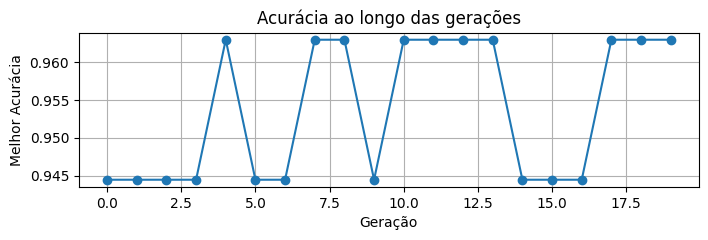

In [232]:
plt.figure(figsize=(8, 2))
plt.plot(range(geracoes), melhores_acuracias, marker='o')
plt.xlabel('Geração')
plt.ylabel('Melhor Acurácia')
plt.title('Acurácia ao longo das gerações')
plt.grid(True)
plt.show()

### Validação Cruzada com K-fold

In [233]:
kf = KFold(n_splits= 5, random_state= 28, shuffle=True)
tree = DecisionTreeClassifier(criterion=melhor_s[0], max_depth=melhor_s[1], min_samples_leaf=melhor_s[2], min_samples_split=melhor_s[3])
scores = cross_val_score(tree, x, y, cv=kf, scoring='accuracy')

# Resultados
print(f'Média dos scores de cada divisão: {scores.mean()}')
print(f'Variabilidade da acurácia entre todas as dobras: {scores.std()}')

Média dos scores de cada divisão: 0.9038095238095238
Variabilidade da acurácia entre todas as dobras: 0.056670001235754934


## Conclusão
##### A acurácia média de 90,38% e a variabilidade de 5,67% indicam que o modelo Decision Tree treinado com hiperparâmetros otimizados via algoritmo genético tem uma performance excelente, embora haja alguma variabilidade entre as diferentes dobras. No entanto, sempre há espaço para melhorias adicionais por meio de ajuste de hiperparâmetros, comparação com outros modelos e técnicas de validação mais robustas.